# Regression

### Importando librerías

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing 
from keras import models, layers, optimizers


### Descargando datos

In [22]:
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

In [23]:
train_data[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [24]:
train_targets[1]

42.3

## Normalización

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)


### Definiendo nuestra red

In [26]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

## K - fold validation

In [35]:
k = 4
num_val_samples = len(trainSc) // 4
num_epoch = 500
all_history = []

In [36]:
0*num_val_samples

0

In [37]:
(0+1) * num_val_samples

101

In [38]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])
    

Fold  0
Fold  1
Fold  2
Fold  3


### Media de todos los MAE

In [39]:
len(all_history[0])

500

In [40]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

### Visualizando resultados

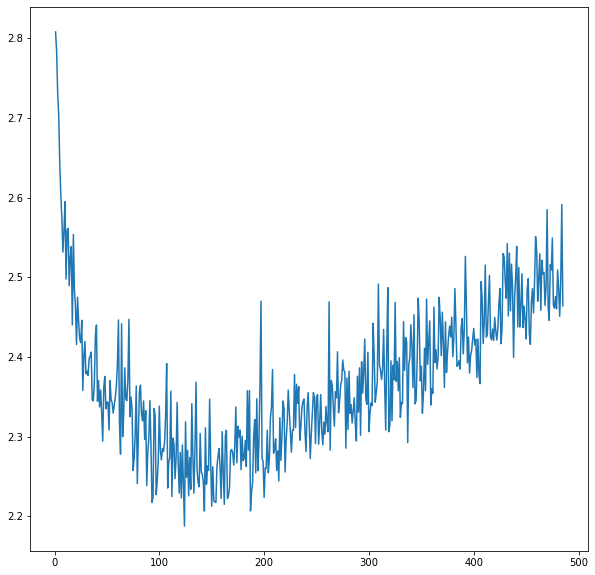

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

### Evaluando el modelo

In [42]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 11.3168 - mae: 2.5434


[11.316780090332031, 2.5433712005615234]

# Tuning

In [45]:
num_epoch = 120
all_history = []
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


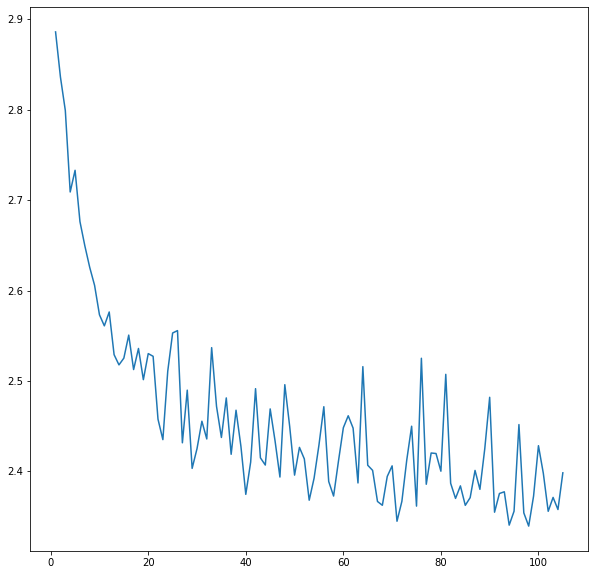

In [46]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [47]:
num_epoch = 98
all_history = []
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])

Fold  0
Fold  1
Fold  2
Fold  3


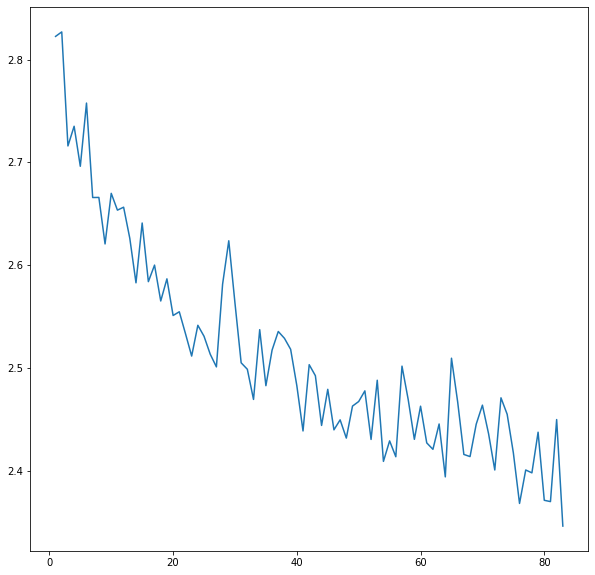

In [48]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [49]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 19.1032 - mae: 2.7904


[19.103178024291992, 2.7903900146484375]